In [477]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import anndata
import gget
from tqdm import tqdm
TQDM_BAR_FORMAT = (
    "{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]"
)
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import textwrap
%config InlineBackend.figure_format='retina'

Get background genes (this take too long):

In [478]:
# bp = "PRJNA665227"
# fastq_folder = f"/home/laura/projects/virus-watch-data/{bp}"

In [479]:
# # Macaque only
# mac_adata = anndata.read(f"{fastq_folder}/full_index_stringent_dlist_flank1/macaque_QC_norm_leiden_celltypes.h5ad")
# mac_adata

In [480]:
# df = gget.info(background, ncbi=False)
# df.to_csv("mac_genes.csv", index=False)
# df

In [481]:
# def clean_genes_list(genes_list):
#     # Remove any NaNs/Nones from the gene list
#     genes_clean = []
#     for gene in genes_list:
#         if not isinstance(gene, float) and not gene is None and not gene=="nan":
#             genes_clean.append(gene)
#     return genes_clean

In [482]:
# background_genes = clean_genes_list(df["ensembl_gene_name"].values)

Perform enrichment analyses:

# Replace gene weights file with new genes after rerunning the models

In [483]:
gene_df = pd.read_csv("logreg_hv_l2_donor_time_gene_weights.csv")
gene_df.head()

,Unnamed: 0,u10 Ensembl ID,u10 weight,u102540 Ensembl ID,u102540 weight,u11150 Ensembl ID,u11150 weight,u202260 Ensembl ID,u202260 weight,u39566 Ensembl ID,u39566 weight,u134800 Ensembl ID,u134800 weight,u102324 Ensembl ID,u102324 weight
0,0,ENSMMUG00000056618.1,0.427253,ENSMMUG00000060506.1,0.595079,ENSMMUG00000065375.1,0.739395,ENSMMUG00000010528.4,1.719808,ENSMMUG00000007240.4,1.326722,ENSMMUG00000017936.4,0.894326,ENSMMUG00000063314.1,1.245991
1,1,ENSMMUG00000051078.1,0.329022,ENSMMUG00000054927.1,0.453654,ENSMMUG00000062154.1,0.274679,ENSMMUG00000046639.2,1.695687,ENSMMUG00000060377.1,1.249671,ENSMMUG00000049479.1,0.775719,ENSMMUG00000042245.2,1.200575
2,2,ENSMMUG00000019302.4,0.309845,ENSMMUG00000010860.4,0.345496,ENSMMUG00000008678.4,0.265010,ENSMMUG00000063208.1,1.392800,ENSMMUG00000055257.1,1.243913,ENSMMUG00000062072.1,0.765200,ENSMMUG00000057850.1,1.098150
3,3,ENSMMUG00000016670.4,0.298107,ENSMMUG00000050854.1,0.321943,ENSMMUG00000051307.1,0.253002,ENSMMUG00000020608.4,1.348042,ENSMMUG00000064658.1,1.204233,ENSMMUG00000062408.1,0.764933,ENSMMUG00000022366.4,1.004854
4,4,ENSMMUG00000050458.1,0.291562,ENSMMUG00000041006.2,0.305653,ENSMMUG00000060294.1,0.249523,ENSMMUG00000052442.1,1.324035,ENSMMUG00000014822.4,1.123155,ENSMMUG00000061849.1,0.691772,ENSMMUG00000051607.1,0.981911


In [484]:
virs = ['u10', 'u102540', 'u11150', 'u202260']

In [485]:
# Number of genes to get gene names from
n_genes = 200

Plot gene weight distributions:

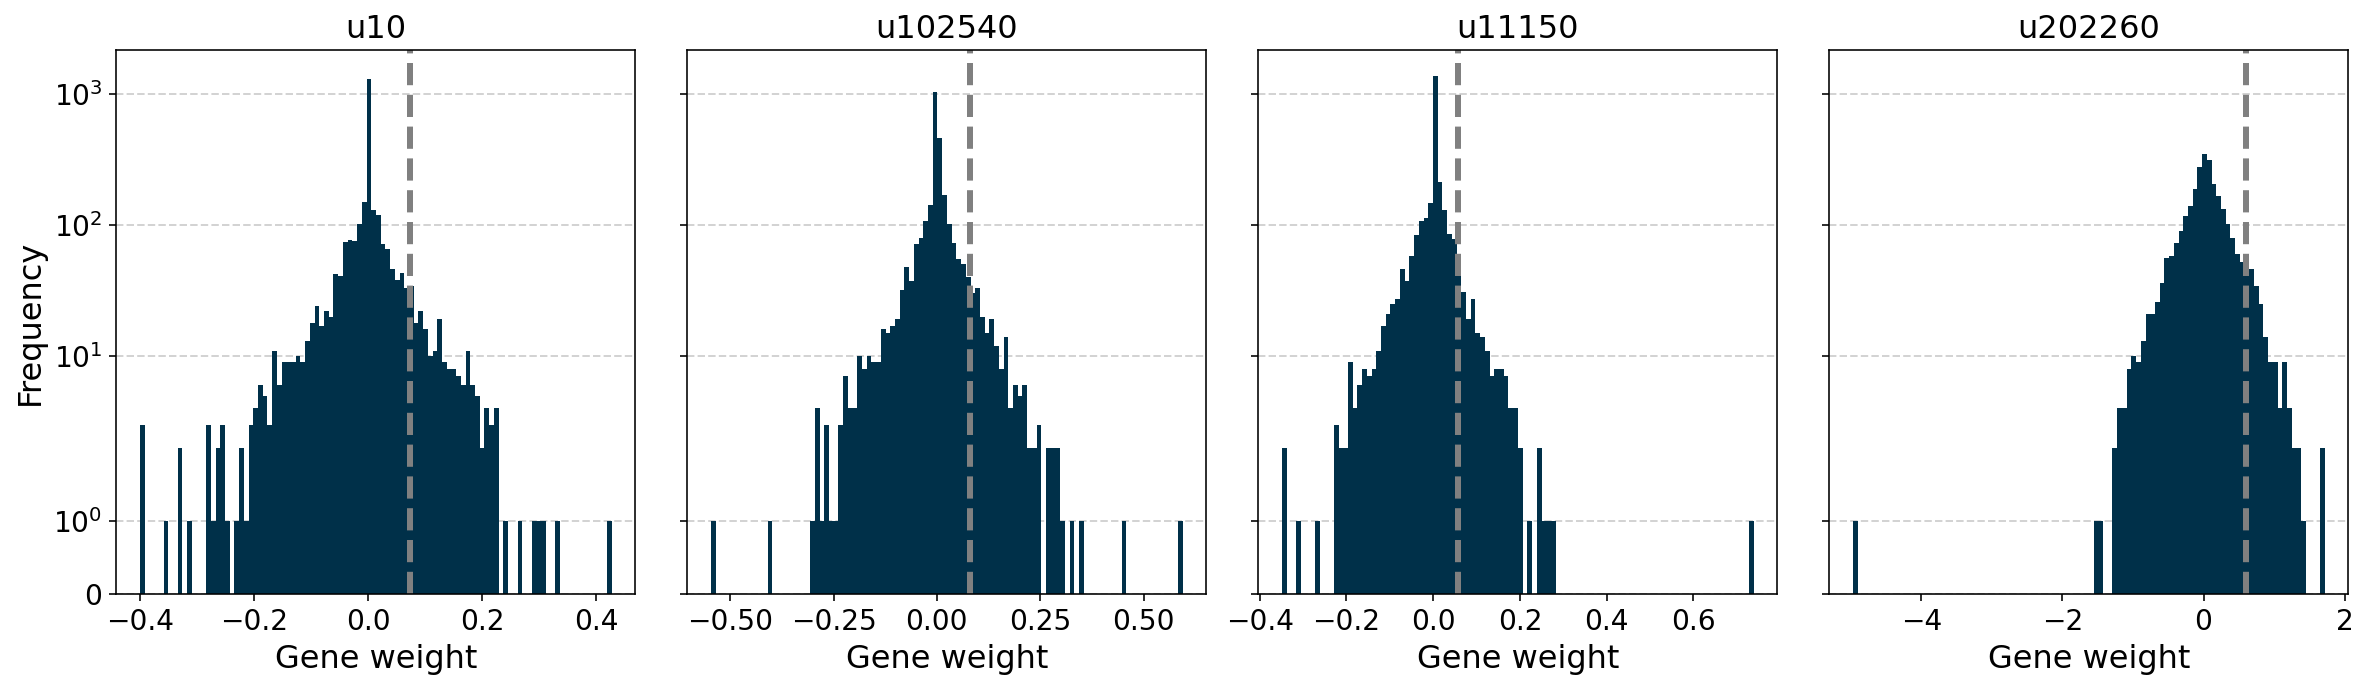

In [486]:
fig, axs = plt.subplots(figsize =(20, 5), ncols=4, sharey=True)
fontsize = 14

col_idx = 0
for vir in virs:
    ax = axs[col_idx]
    ax.hist(gene_df[f"{vir} weight"].values, bins = 100, color="#003049")
    ax.set_title(vir, fontsize=fontsize+2)
    
    ax.grid(True, which="both", color='lightgray', ls="--", lw=1)
    ax.set_axisbelow(True)
    ax.xaxis.grid(False)
    
    ax.set_yscale("symlog")
    ax.tick_params(axis="both", labelsize=fontsize)
    
    if col_idx == 0:
        ax.set_ylabel("Frequency", fontsize=fontsize+2)
    ax.set_xlabel("Gene weight", fontsize=fontsize+2)
    
    # Shoe cut-off based on X number of top genes
    ax.axvline(gene_df[f"{vir} weight"].values[n_genes], ls="--", color="grey", lw=3)
    
    col_idx += 1
 
plt.subplots_adjust(wspace=0.1, hspace=0.2)

fig.savefig(
    f"figures/hv_l2_donor_time_gene_weights.png", dpi=300, bbox_inches="tight", transparent=True
)

fig.show()

In [487]:
# def blast_missing_genes(df):
#     missing_genes = df[df["ensembl_gene_name"].isnull()]["ensembl_gene_name"].values
    
#     with tqdm(total=len(missing_genes), bar_format=TQDM_BAR_FORMAT) as pbar:
#         pbar.set_description("BLASTing genes")
#         for gene in missing_genes:
#             blast_df = gget.blast(gget.seq(gene, verbose=False)[1], verbose=False)
            
#             # Add BLAST gene name to df
            
            
#             pbar.update(n=1)
        
#     return df

In [488]:
# # Get gene symbols/names from Ensembl ID with gget info
# u10_info_df = gget.info(gene_df["u10 Ensembl ID"][:n_genes].values, verbose=False)
# u10_info_df.to_csv("logreg_hv_l2_donor_time_u10_genes.csv", index=False)

u10_info_df = pd.read_csv("logreg_hv_l2_donor_time_u10_genes.csv")
u10_info_df.head()

,ensembl_id,uniprot_id,pdb_id,ncbi_gene_id,species,assembly_name,primary_gene_name,ensembl_gene_name,synonyms,parent_gene,protein_names,ensembl_description,uniprot_description,ncbi_description,subcellular_localisation,object_type,biotype,canonical_transcript,seq_region_name,strand,start,end,all_transcripts,transcript_biotypes,transcript_names,transcript_strands,transcript_starts,transcript_ends,all_exons,exon_starts,exon_ends,all_translations,translation_starts,translation_ends
0,ENSMMUG00000056618.1,"['A0A5F8AHW4', 'F7EC56']",NaN,695240.0,macaca_mulatta,Mmul_10,LIPA,LIPA,[],NaN,Lipase,"lipase A, lysosomal acid type [Source:VGNC Sym...",NaN,NaN,[nan nan],Gene,protein_coding,ENSMMUT00000108179.1,9,-1,89485613,89525810,"['ENSMMUT00000108179.1', 'ENSMMUT00000101549.1']","['protein_coding', 'protein_coding']","['LIPA-201', 'LIPA-202']","[-1, -1]","[89485613, 89487495]","[89525810, 89522028]",NaN,NaN,NaN,NaN,NaN,NaN
1,ENSMMUG00000051078.1,A0A5F8A969,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,[nan],NaN,NaN,Gene,protein_coding,ENSMMUT00000086055.1,19,1,51507340,51512835,['ENSMMUT00000086055.1'],['protein_coding'],[nan],[1],[51507340],[51512835],NaN,NaN,NaN,NaN,NaN,NaN
2,ENSMMUG00000019302.4,F6S9W7,NaN,694451.0,macaca_mulatta,Mmul_10,TNFSF10,TNFSF10,['TNLG6A'],NaN,Tumor necrosis factor ligand superfamily member,TNF superfamily member 10 [Source:VGNC Symbol;...,NaN,NaN,"['Membrane', 'Secreted']",Gene,protein_coding,ENSMMUT00000027108.4,2,-1,77429441,77448519,['ENSMMUT00000027108.4'],['protein_coding'],['TNFSF10-201'],[-1],[77429441],[77448519],NaN,NaN,NaN,NaN,NaN,NaN
3,ENSMMUG00000016670.4,F6VU61,NaN,713614.0,macaca_mulatta,Mmul_10,RNF20,RNF20,[],NaN,E3 ubiquitin protein ligase,ring finger protein 20 [Source:VGNC Symbol;Acc...,NaN,NaN,['Nucleus'],Gene,protein_coding,ENSMMUT00000093344.1,15,-1,41313705,41345866,"['ENSMMUT00000093344.1', 'ENSMMUT00000023429.4...","['protein_coding', 'protein_coding', 'protein_...","['RNF20-201', 'RNF20-202', 'RNF20-203']","[-1, -1, -1]","[41313705, 41317367, 41318283]","[41344353, 41345866, 41345648]",NaN,NaN,NaN,NaN,NaN,NaN
4,ENSMMUG00000050458.1,A0A5F8ATP1,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,[nan],NaN,NaN,Gene,protein_coding,ENSMMUT00000095561.1,16,1,50201739,50202761,['ENSMMUT00000095561.1'],['protein_coding'],[nan],[1],[50201739],[50202761],NaN,NaN,NaN,NaN,NaN,NaN


Other databases to try:  
KEGG_2021_Human  
WikiPathway_2023_Human  
Reactome_2022  
GO_Biological_Process_2023  
GO_Molecular_Function_2023  
Microbe_Perturbations_from_GEO_up  
Virus_Perturbations_from_GEO_up  

In [489]:
# Enrichment database
database="Microbe_Perturbations_from_GEO_up"
database="pathway"

Mon Dec  4 19:26:09 2023 INFO Performing Enichr analysis using database KEGG_2021_Human. 
    Please note that there might be a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    
Mon Dec  4 19:26:09 2023 INFO Background genes set to > 20,000 default background genes listed here: https://github.com/pachterlab/gget/blob/main/gget/constants/enrichr_bkg_genes.txt.


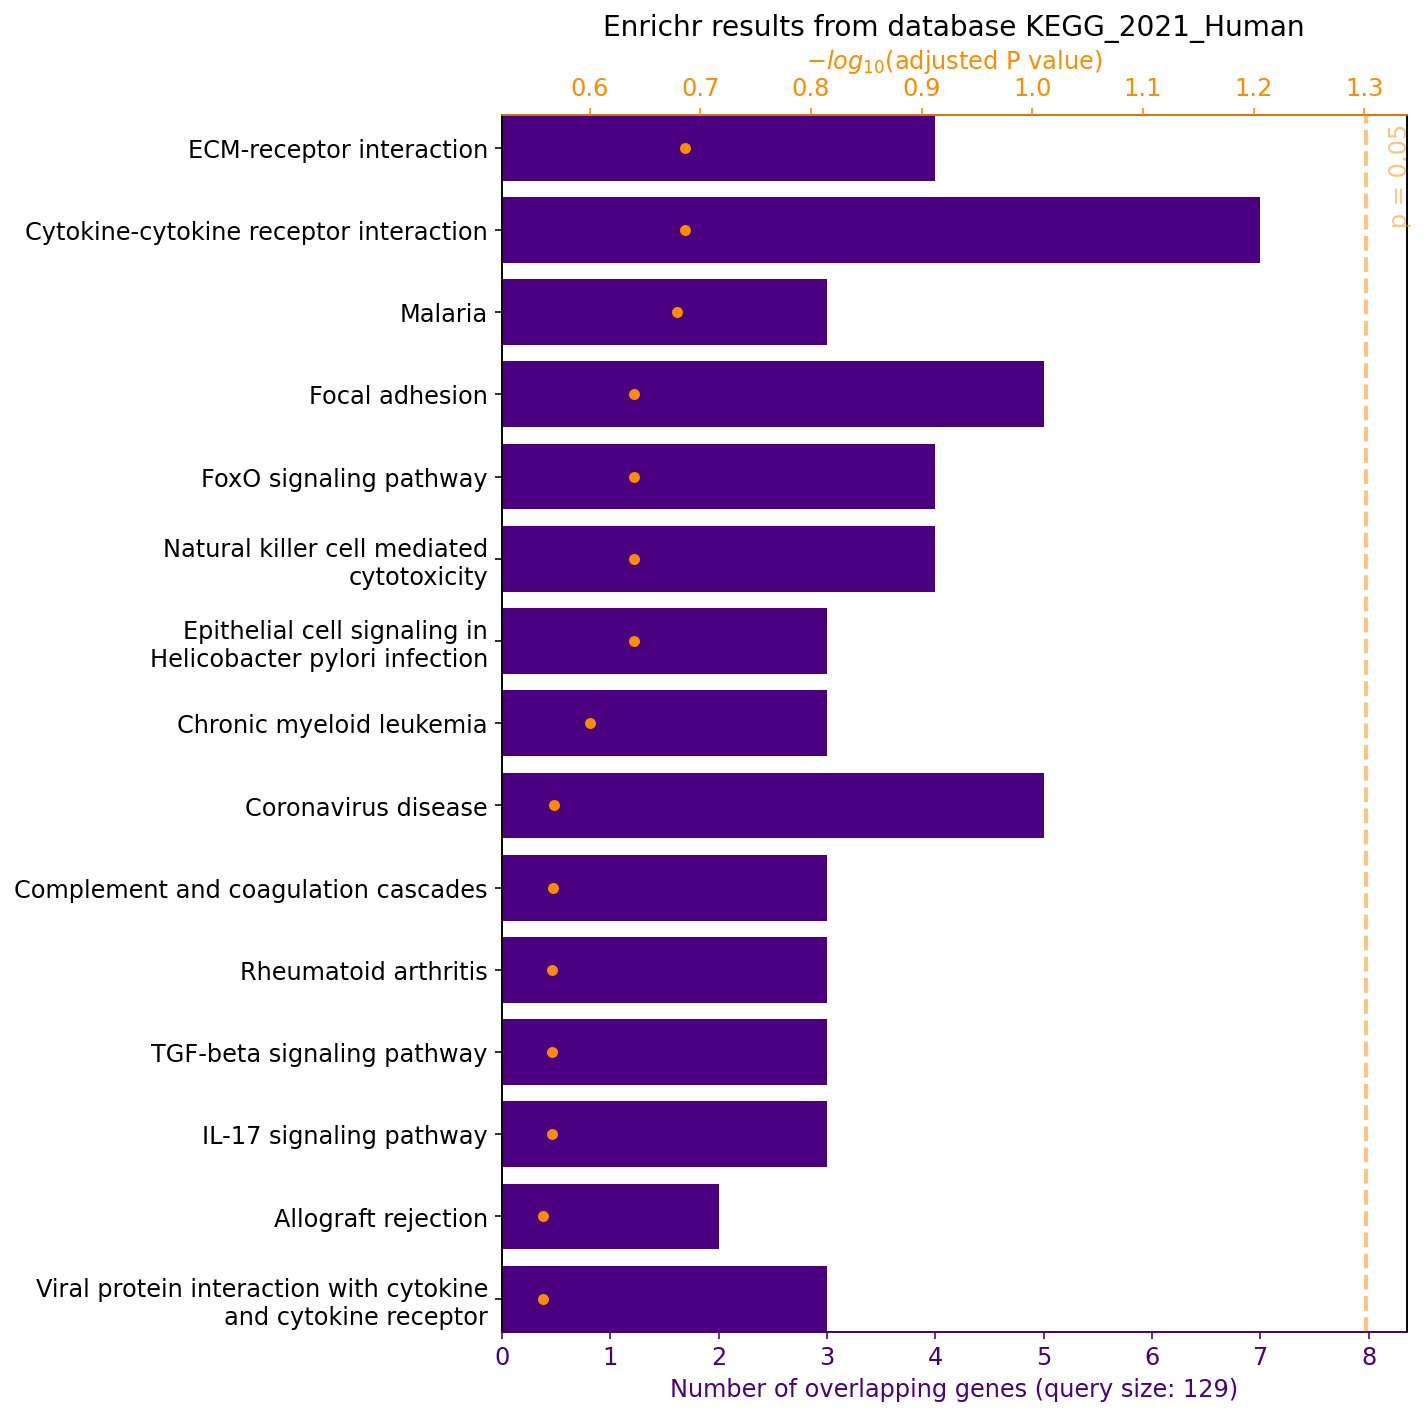

In [490]:
# Perform enrichment analysis
u10_enrichr_df = gget.enrichr(u10_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database, background=True, plot=True)

In [491]:
# u11150_info_df = gget.info(gene_df["u11150 Ensembl ID"][:n_genes].values, verbose=False)
# u11150_info_df.to_csv("logreg_hv_l2_donor_time_u11150_genes.csv", index=False)

u11150_info_df = pd.read_csv("logreg_hv_l2_donor_time_u11150_genes.csv")
u11150_info_df.head()

,ensembl_id,uniprot_id,pdb_id,ncbi_gene_id,species,assembly_name,primary_gene_name,ensembl_gene_name,synonyms,parent_gene,protein_names,ensembl_description,uniprot_description,ncbi_description,subcellular_localisation,object_type,biotype,canonical_transcript,seq_region_name,strand,start,end,all_transcripts,transcript_biotypes,transcript_names,transcript_strands,transcript_starts,transcript_ends,all_exons,exon_starts,exon_ends,all_translations,translation_starts,translation_ends
0,ENSMMUG00000065375.1,Q6IYH3,NaN,2846629.0,macaca_mulatta,Mmul_10,ATP6,ATP6,[],NaN,ATP synthase subunit a,ATP synthase F0 subunit 6 [Source:NCBI gene (f...,Mitochondrial membrane ATP synthase (F(1)F(0) ...,NaN,"['Membrane', 'Mitochondrion inner membrane']",Gene,protein_coding,ENSMMUT00000110393.1,MT,1,8518,9198,['ENSMMUT00000110393.1'],['protein_coding'],['ATP6-201'],[1],[8518],[9198],NaN,NaN,NaN,NaN,NaN,NaN
1,ENSMMUG00000062154.1,NaN,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,Gene,pseudogene,ENSMMUT00000090324.1,1,-1,131841368,131848061,['ENSMMUT00000090324.1'],['pseudogene'],[nan],[-1],[131841368],[131848061],NaN,NaN,NaN,NaN,NaN,NaN
2,ENSMMUG00000008678.4,"['A0A5F7ZNG3', 'F7EZ68', 'G7MQR7']",NaN,700855.0,macaca_mulatta,Mmul_10,SIRT5,SIRT5,[],NaN,"NAD-dependent protein deacylase sirtuin-5, mit...",sirtuin 5 [Source:VGNC Symbol;Acc:VGNC:77485],"NAD-dependent lysine demalonylase, desuccinyla...",NaN,"['Mitochondrion', 'Cytoplasm, cytosol', 'Nucle...",Gene,protein_coding,ENSMMUT00000012134.4,4,-1,156384675,156435604,"['ENSMMUT00000102539.1', 'ENSMMUT00000070701.2...","['protein_coding', 'protein_coding', 'protein_...","['SIRT5-201', 'SIRT5-202', 'SIRT5-203', 'SIRT5...","[-1, -1, -1, -1, -1, -1, -1, -1]","[156384675, 156384726, 156387098, 156387170, 1...","[156425265, 156424979, 156424765, 156424794, 1...",NaN,NaN,NaN,NaN,NaN,NaN
3,ENSMMUG00000051307.1,NaN,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,Gene,lncRNA,ENSMMUT00000100887.1,16,-1,20781192,20790427,"['ENSMMUT00000093394.1', 'ENSMMUT00000100887.1']","['lncRNA', 'lncRNA']","[nan, nan]","[-1, -1]","[20781192, 20781192]","[20790427, 20788136]",NaN,NaN,NaN,NaN,NaN,NaN
4,ENSMMUG00000060294.1,F7HAP4,NaN,696629.0,macaca_mulatta,Mmul_10,H2AC6,H2AC6,['HIST1H2AC'],NaN,Histone H2A,H2A clustered histone 6 [Source:VGNC Symbol;Ac...,NaN,NaN,"['Chromosome', 'Nucleus']",Gene,protein_coding,ENSMMUT00000057350.2,4,-1,143851758,143868220,['ENSMMUT00000057350.2'],['protein_coding'],['H2AC6-201'],[-1],[143851758],[143868220],NaN,NaN,NaN,NaN,NaN,NaN


Mon Dec  4 19:26:11 2023 INFO Performing Enichr analysis using database KEGG_2021_Human. 
    Please note that there might be a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    
Mon Dec  4 19:26:11 2023 INFO Background genes set to > 20,000 default background genes listed here: https://github.com/pachterlab/gget/blob/main/gget/constants/enrichr_bkg_genes.txt.


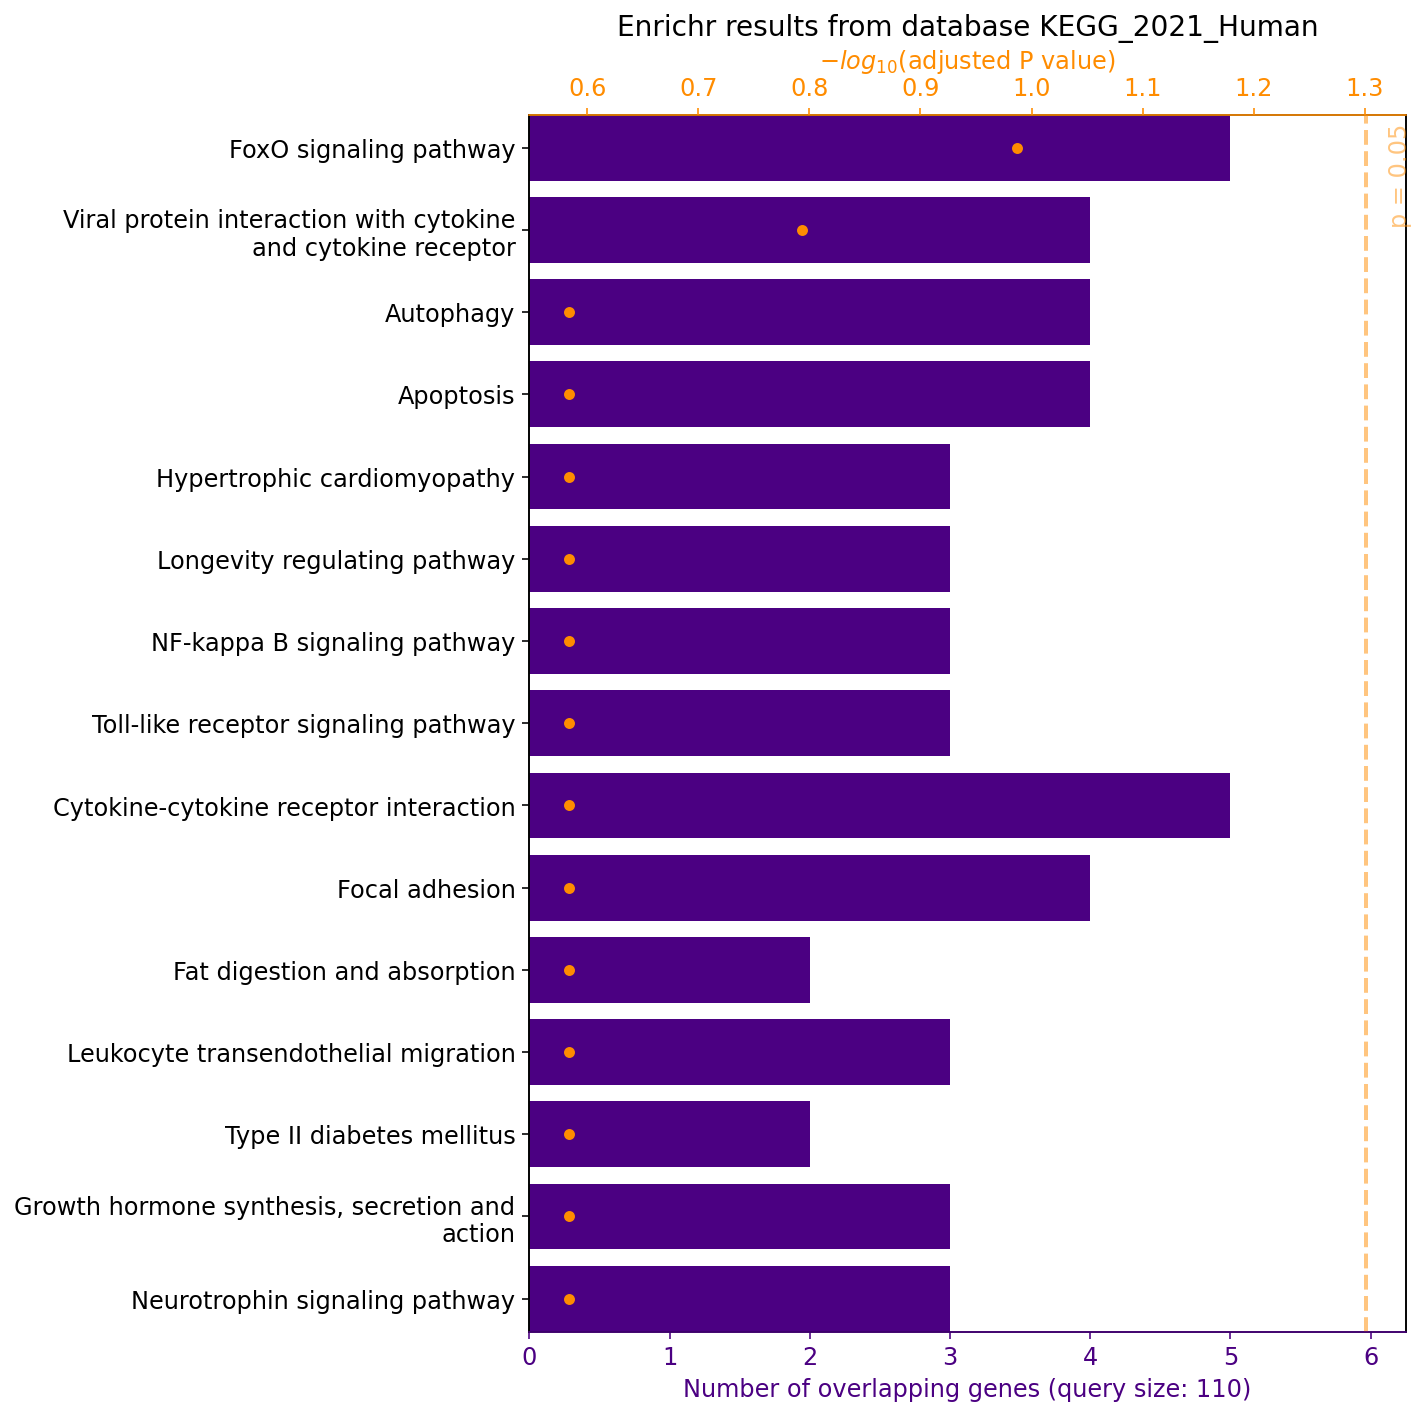

In [492]:
u11150_enrichr_df = gget.enrichr(u11150_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database, background=True, plot=True)

In [493]:
# u202260_info_df = gget.info(gene_df["u202260 Ensembl ID"][:n_genes].values, verbose=False)
# u202260_info_df.to_csv("logreg_hv_l2_donor_time_u202260_genes.csv", index=False)

u202260_info_df = pd.read_csv("logreg_hv_l2_donor_time_u202260_genes.csv")
u202260_info_df.head()

,ensembl_id,uniprot_id,pdb_id,ncbi_gene_id,species,assembly_name,primary_gene_name,ensembl_gene_name,synonyms,parent_gene,protein_names,ensembl_description,uniprot_description,ncbi_description,subcellular_localisation,object_type,biotype,canonical_transcript,seq_region_name,strand,start,end,all_transcripts,transcript_biotypes,transcript_names,transcript_strands,transcript_starts,transcript_ends,all_exons,exon_starts,exon_ends,all_translations,translation_starts,translation_ends
0,ENSMMUG00000010528.4,A0A1D5R2I2,NaN,NaN,macaca_mulatta,Mmul_10,ZNF33B,ZNF33B,[],NaN,NaN,zinc finger protein 33B [Source:HGNC Symbol;Ac...,[nan],NaN,NaN,Gene,protein_coding,ENSMMUT00000061021.2,9,-1,40455909,40504089,['ENSMMUT00000061021.2'],['protein_coding'],['ZNF33B-201'],[-1],[40455909],[40504089],NaN,NaN,NaN,NaN,NaN,NaN
1,ENSMMUG00000046639.2,"['A0A1D5Q3B6', 'A0A5F7ZVK6', 'A0A1D5QJ25']",NaN,712342.0,macaca_mulatta,Mmul_10,OAS3,OAS3,[],NaN,2'-5' oligoadenylate synthase,2'-5'-oligoadenylate synthetase 3 [Source:VGNC...,NaN,NaN,Cytoplasm,Gene,protein_coding,ENSMMUT00000059502.2,11,1,112660500,112689922,"['ENSMMUT00000090125.1', 'ENSMMUT00000065666.2...","['protein_coding', 'protein_coding', 'protein_...","['OAS3-201', 'OAS3-202', 'OAS3-203', 'OAS3-204']","[1, 1, 1, 1]","[112660500, 112661357, 112661418, 112661481]","[112686711, 112689922, 112689867, 112687232]",NaN,NaN,NaN,NaN,NaN,NaN
2,ENSMMUG00000063208.1,NaN,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,Gene,lncRNA,ENSMMUT00000079397.1,6,1,177068218,177076184,['ENSMMUT00000079397.1'],['lncRNA'],[nan],[1],[177068218],[177076184],NaN,NaN,NaN,NaN,NaN,NaN
3,ENSMMUG00000020608.4,"['A0A5F7ZAT8', 'G7NEL5']",NaN,716146.0,macaca_mulatta,Mmul_10,ABCA1,ABCA1,[],NaN,"[nan, nan]",ATP binding cassette subfamily A member 1 [Sou...,NaN,NaN,Membrane,Gene,protein_coding,ENSMMUT00000099695.1,15,1,37954747,38098656,"['ENSMMUT00000028999.4', 'ENSMMUT00000099695.1']","['protein_coding', 'protein_coding']","['ABCA1-201', 'ABCA1-202']","[1, 1]","[37954747, 37979838]","[38098656, 38098656]",NaN,NaN,NaN,NaN,NaN,NaN
4,ENSMMUG00000052442.1,A0A5F7ZRR0,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,Secreted protein,NaN,[nan],NaN,NaN,Gene,protein_coding,ENSMMUT00000098741.1,4,-1,148578301,148580089,['ENSMMUT00000098741.1'],['protein_coding'],[nan],[-1],[148578301],[148580089],NaN,NaN,NaN,NaN,NaN,NaN


Mon Dec  4 19:26:13 2023 INFO Performing Enichr analysis using database KEGG_2021_Human. 
    Please note that there might be a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    
Mon Dec  4 19:26:14 2023 INFO Background genes set to > 20,000 default background genes listed here: https://github.com/pachterlab/gget/blob/main/gget/constants/enrichr_bkg_genes.txt.


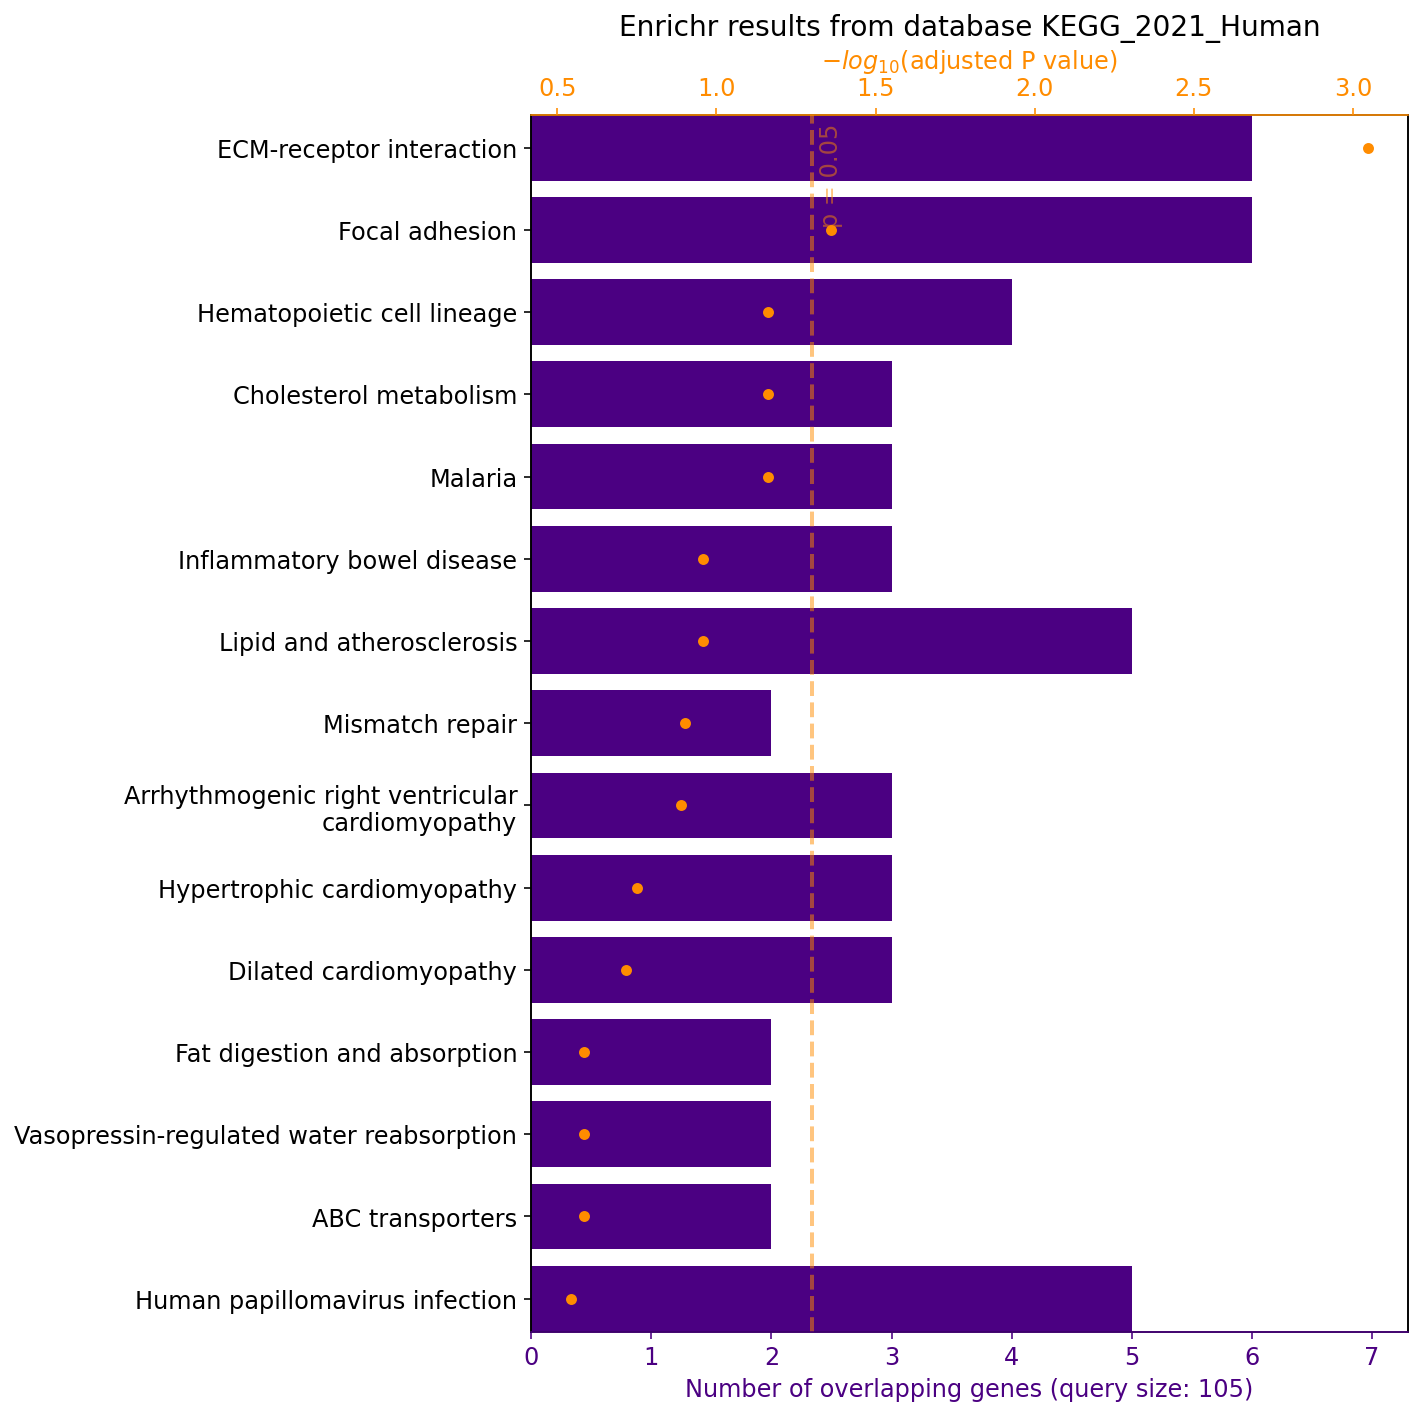

In [494]:
u202260_enrichr_df = gget.enrichr(u202260_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database, background=True, plot=True)

In [495]:
# u102540_info_df = gget.info(gene_df["u102540 Ensembl ID"][:n_genes].values, verbose=False)
# u102540_info_df.to_csv("logreg_hv_l2_donor_time_u102540_genes.csv", index=False)

u102540_info_df = pd.read_csv("logreg_hv_l2_donor_time_u102540_genes.csv")
u102540_info_df.head()

,ensembl_id,uniprot_id,pdb_id,ncbi_gene_id,species,assembly_name,primary_gene_name,ensembl_gene_name,synonyms,parent_gene,protein_names,ensembl_description,uniprot_description,ncbi_description,subcellular_localisation,object_type,biotype,canonical_transcript,seq_region_name,strand,start,end,all_transcripts,transcript_biotypes,transcript_names,transcript_strands,transcript_starts,transcript_ends,all_exons,exon_starts,exon_ends,all_translations,translation_starts,translation_ends
0,ENSMMUG00000060506.1,NaN,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,Gene,pseudogene,ENSMMUT00000106913.1,3,-1,12741490,12746048,['ENSMMUT00000106913.1'],['pseudogene'],[nan],[-1],[12741490],[12746048],NaN,NaN,NaN,NaN,NaN,NaN
1,ENSMMUG00000054927.1,A0A5F8A8A5,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,[nan],NaN,NaN,Gene,protein_coding,ENSMMUT00000105890.1,1,1,90861734,90865529,['ENSMMUT00000105890.1'],['protein_coding'],[nan],[1],[90861734],[90865529],NaN,NaN,NaN,NaN,NaN,NaN
2,ENSMMUG00000010860.4,F7G337,NaN,702188.0,macaca_mulatta,Mmul_10,TOGARAM1,TOGARAM1,['FAM179B'],NaN,NaN,TOG array regulator of axonemal microtubules 1...,[nan],NaN,NaN,Gene,protein_coding,ENSMMUT00000015190.4,7,1,107257613,107373808,['ENSMMUT00000015190.4'],['protein_coding'],['TOGARAM1-201'],[1],[107257613],[107373808],NaN,NaN,NaN,NaN,NaN,NaN
3,ENSMMUG00000050854.1,NaN,NaN,NaN,macaca_mulatta,Mmul_10,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,Gene,lncRNA,ENSMMUT00000100874.1,2,1,82870042,82877262,['ENSMMUT00000100874.1'],['lncRNA'],[nan],[1],[82870042],[82877262],NaN,NaN,NaN,NaN,NaN,NaN
4,ENSMMUG00000041006.2,"['A0A1D5QCN3', 'A0A5F7ZU79']",NaN,712099.0,macaca_mulatta,Mmul_10,FAM171A2,FAM171A2,[],NaN,"[nan, nan]",family with sequence similarity 171 member A2 ...,NaN,NaN,Membrane,Gene,protein_coding,ENSMMUT00000067981.2,16,-1,55623447,55633911,"['ENSMMUT00000067981.2', 'ENSMMUT00000094042.1']","['protein_coding', 'protein_coding']","['FAM171A2-201', 'FAM171A2-202']","[-1, -1]","[55623447, 55627409]","[55633777, 55633911]",NaN,NaN,NaN,NaN,NaN,NaN


Mon Dec  4 19:26:15 2023 INFO Performing Enichr analysis using database KEGG_2021_Human. 
    Please note that there might be a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    
Mon Dec  4 19:26:16 2023 INFO Background genes set to > 20,000 default background genes listed here: https://github.com/pachterlab/gget/blob/main/gget/constants/enrichr_bkg_genes.txt.


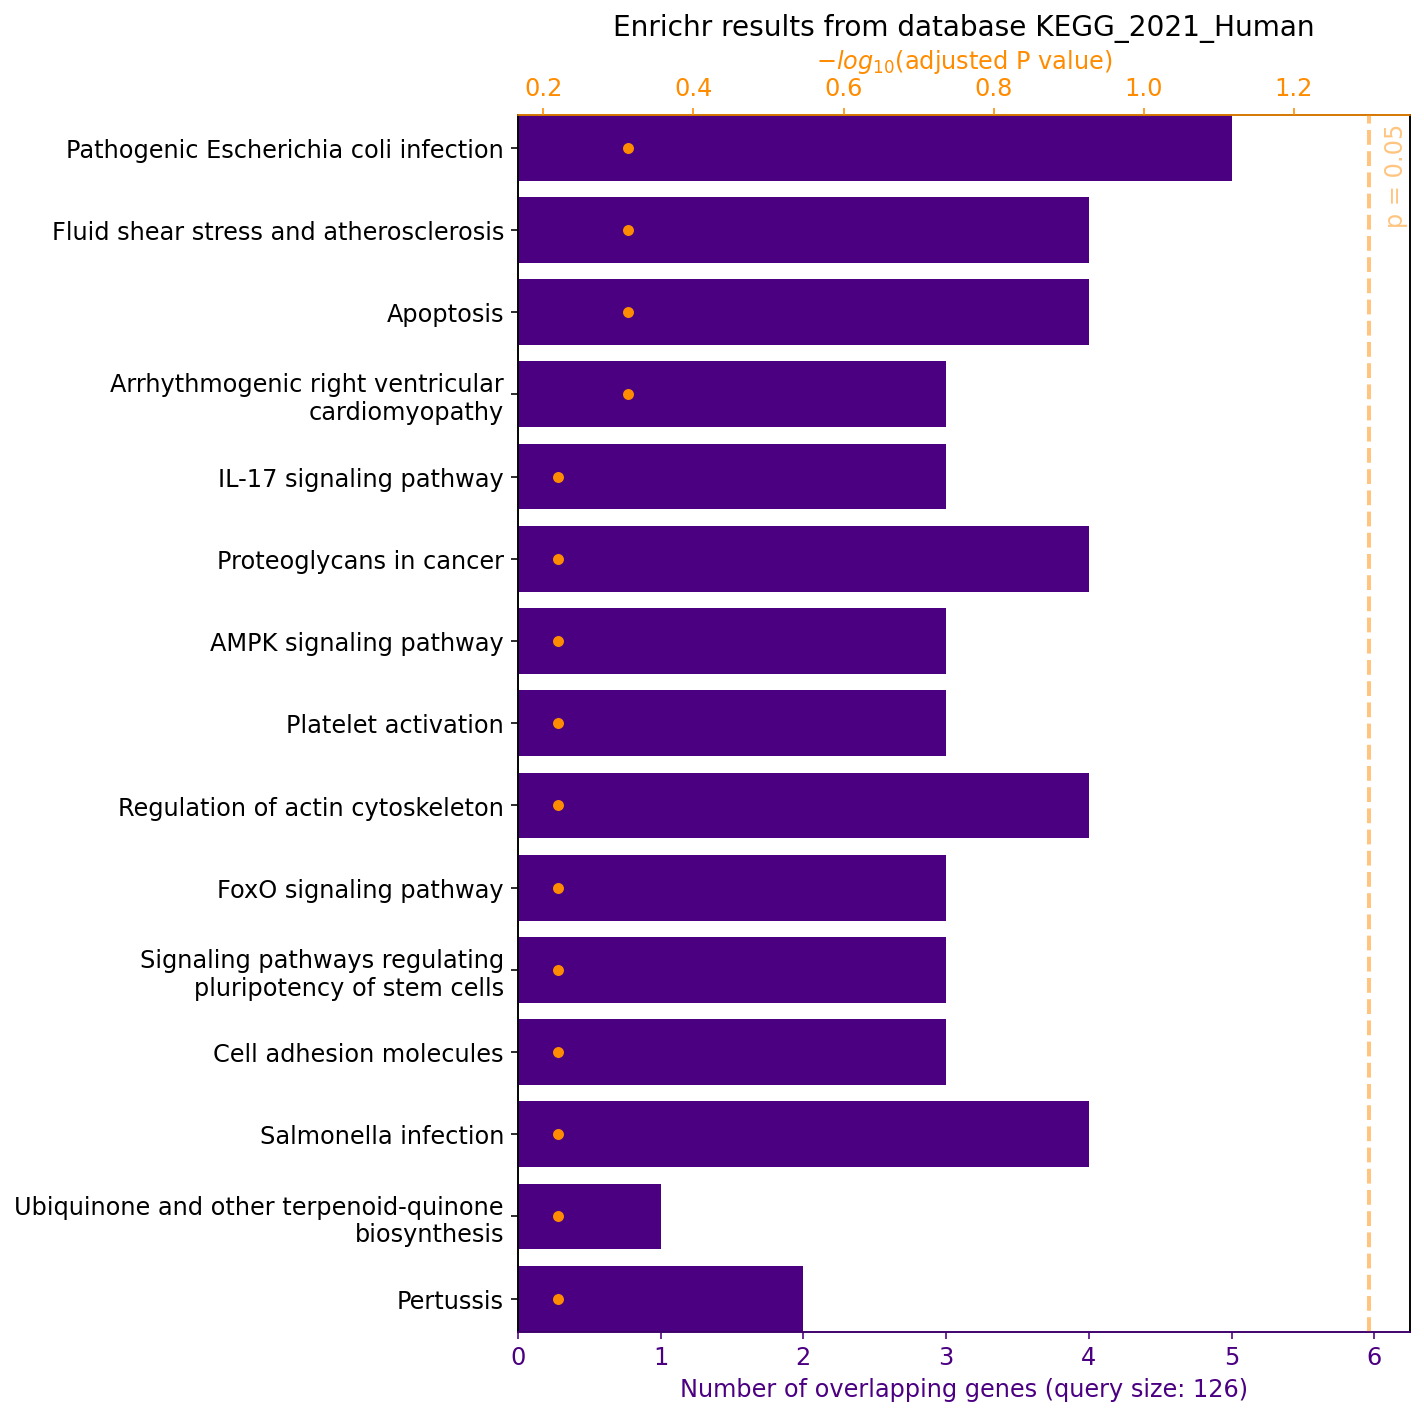

In [496]:
u102540_enrichr_df = gget.enrichr(u102540_info_df["ensembl_gene_name"].dropna(axis=0).values, database=database, background=True, plot=True)

### Combine enrichment results into one plot

In [497]:
pd.set_option('display.max_rows', None)

In [504]:
u10_enrichr_df.iloc[1]["overlapping_genes"]

['CCL24', 'IL1RL1', 'IFNG', 'TGFB3', 'TNFSF10', 'INHBB', 'CCL17']

In [498]:
u10_enrichr_df

,rank,path_name,p_val,z_score,combined_score,overlapping_genes,adj_p_val,database
0,1,ECM-receptor interaction,0.002155,7.893148,48.463797,"[RELN, VWF, ITGA2, COL6A5]",0.206156,KEGG_2021_Human
1,2,Cytokine-cytokine receptor interaction,0.002383,4.088194,24.689700,"[CCL24, IL1RL1, IFNG, TGFB3, TNFSF10, INHBB, C...",0.206156,KEGG_2021_Human
2,3,Malaria,0.003631,10.513898,59.069018,"[SELP, IFNG, TGFB3]",0.209401,KEGG_2021_Human
3,4,Focal adhesion,0.008034,4.261665,20.558830,"[SHC4, RELN, VWF, ITGA2, COL6A5]",0.229273,KEGG_2021_Human
4,5,FoxO signaling pathway,0.008616,5.251258,24.965356,"[TGFB3, TNFSF10, IRS2, GADD45G]",0.229273,KEGG_2021_Human
5,6,Natural killer cell mediated cytotoxicity,0.008846,5.209654,24.630406,"[SHC4, IFNG, TNFSF10, PRF1]",0.229273,KEGG_2021_Human
6,7,Epithelial cell signaling in Helicobacter pylo...,0.009277,7.368199,34.484829,"[TJP1, JAM2, HBEGF]",0.229273,KEGG_2021_Human
7,8,Chronic myeloid leukemia,0.011601,6.760605,30.129846,"[SHC4, TGFB3, GADD45G]",0.250868,KEGG_2021_Human
8,9,Coronavirus disease,0.014073,3.687978,15.723557,"[SELP, VWF, C3AR1, ISG15, HBEGF]",0.270524,KEGG_2021_Human
9,10,Complement and coagulation cascades,0.015662,6.015932,25.005310,"[SERPINA1, VWF, C3AR1]",0.270954,KEGG_2021_Human


In [499]:
u102540_enrichr_df

,rank,path_name,p_val,z_score,combined_score,overlapping_genes,adj_p_val,database
0,1,Pathogenic Escherichia coli infection,0.006700,4.462141,22.335754,"[MAPK11, MYO10, MYO6, TNFSF10, MYH11]",0.487374,KEGG_2021_Human
1,2,Fluid shear stress and atherosclerosis,0.009740,5.059950,23.435198,"[NQO1, THBD, MAPK11, CTSL]",0.487374,KEGG_2021_Human
2,3,Apoptosis,0.010735,4.912319,22.273550,"[CTSL, LMNA, TNFSF10, PRF1]",0.487374,KEGG_2021_Human
3,4,Arrhythmogenic right ventricular cardiomyopathy,0.011269,6.835269,30.661114,"[DSP, ITGA2, LMNA]",0.487374,KEGG_2021_Human
4,5,IL-17 signaling pathway,0.019188,5.553719,21.956442,"[MAPK11, LCN2, S100A9]",0.602532,KEGG_2021_Human
5,6,Proteoglycans in cancer,0.033918,3.413636,11.551118,"[MAPK11, CTSL, ITGA2, IGF1R]",0.602532,KEGG_2021_Human
6,7,AMPK signaling pathway,0.035958,4.314050,14.345927,"[FBP2, IGF1R, CREB5]",0.602532,KEGG_2021_Human
7,8,Platelet activation,0.039035,4.170617,13.526532,"[MAPK11, ITGA2, ARHGAP35]",0.602532,KEGG_2021_Human
8,9,Regulation of actin cytoskeleton,0.042311,3.170892,10.028631,"[ITGA2, MYH11, IQGAP3, ARHGAP35]",0.602532,KEGG_2021_Human
9,10,FoxO signaling pathway,0.043894,3.972408,12.417701,"[MAPK11, TNFSF10, IGF1R]",0.602532,KEGG_2021_Human


In [500]:
u11150_enrichr_df

,rank,path_name,p_val,z_score,combined_score,overlapping_genes,adj_p_val,database
0,1,FoxO signaling pathway,0.000589,7.987059,59.401308,"[MAPK11, IRS1, IRS2, GADD45G, IGF1R]",0.103064,KEGG_2021_Human
1,2,Viral protein interaction with cytokine and cy...,0.001841,8.250809,51.960487,"[CXCL9, CCL4L1, TNFRSF10A, CCL18]",0.161059,KEGG_2021_Human
2,3,Autophagy,0.005552,5.989997,31.109286,"[CTSL, IRS1, IRS2, IGF1R]",0.260815,KEGG_2021_Human
3,4,Apoptosis,0.006457,5.727874,28.883133,"[CTSL, LMNA, TNFRSF10A, GADD45G]",0.260815,KEGG_2021_Human
4,5,Hypertrophic cardiomyopathy,0.011544,6.765584,30.185034,"[EDN1, MYL2, LMNA]",0.260815,KEGG_2021_Human
5,6,Longevity regulating pathway,0.016137,5.942016,24.520623,"[IRS1, IRS2, IGF1R]",0.260815,KEGG_2021_Human
6,7,NF-kappa B signaling pathway,0.016559,5.882308,24.122168,"[CCL4L1, ERC1, GADD45G]",0.260815,KEGG_2021_Human
7,8,Toll-like receptor signaling pathway,0.016988,5.823781,23.733292,"[MAPK11, CXCL9, CCL4L1]",0.260815,KEGG_2021_Human
8,9,Cytokine-cytokine receptor interaction,0.018953,3.414807,13.542431,"[ACVRL1, CXCL9, CCL4L1, TNFRSF10A, CCL18]",0.260815,KEGG_2021_Human
9,10,Focal adhesion,0.020503,4.021399,15.631854,"[RELN, MYL2, VCL, IGF1R]",0.260815,KEGG_2021_Human


In [501]:
u202260_enrichr_df

,rank,path_name,p_val,z_score,combined_score,overlapping_genes,adj_p_val,database
0,1,ECM-receptor interaction,0.000005,15.399045,187.217701,"[ITGA3, ITGA2B, TNR, ITGA7, CD36, THBS1]",0.000897,KEGG_2021_Human
1,2,Focal adhesion,0.000509,6.473164,49.089327,"[JUN, ITGA3, ITGA2B, TNR, ITGA7, THBS1]",0.043500,KEGG_2021_Human
2,3,Hematopoietic cell lineage,0.001542,8.676661,56.177117,"[ITGA3, IL1R2, ITGA2B, CD36]",0.068620,KEGG_2021_Human
3,4,Cholesterol metabolism,0.002006,13.052553,81.074616,"[ABCA1, LRPAP1, CD36]",0.068620,KEGG_2021_Human
4,5,Malaria,0.002006,13.052553,81.074616,"[IL10, CD36, THBS1]",0.068620,KEGG_2021_Human
5,6,Inflammatory bowel disease,0.004236,9.887419,54.026150,"[IL21, IL10, JUN]",0.110559,KEGG_2021_Human
6,7,Lipid and atherosclerosis,0.004526,4.928571,26.604221,"[ABCA1, CAMK2B, JUN, CYP1A1, CD36]",0.110559,KEGG_2021_Human
7,8,Mismatch repair,0.005850,19.306931,99.264147,"[MSH2, EXO1]",0.125036,KEGG_2021_Human
8,9,Arrhythmogenic right ventricular cardiomyopathy,0.006794,8.279189,41.326845,"[ITGA3, ITGA2B, ITGA7]",0.129094,KEGG_2021_Human
9,10,Hypertrophic cardiomyopathy,0.010415,7.037586,32.123106,"[ITGA3, ITGA2B, ITGA7]",0.178097,KEGG_2021_Human


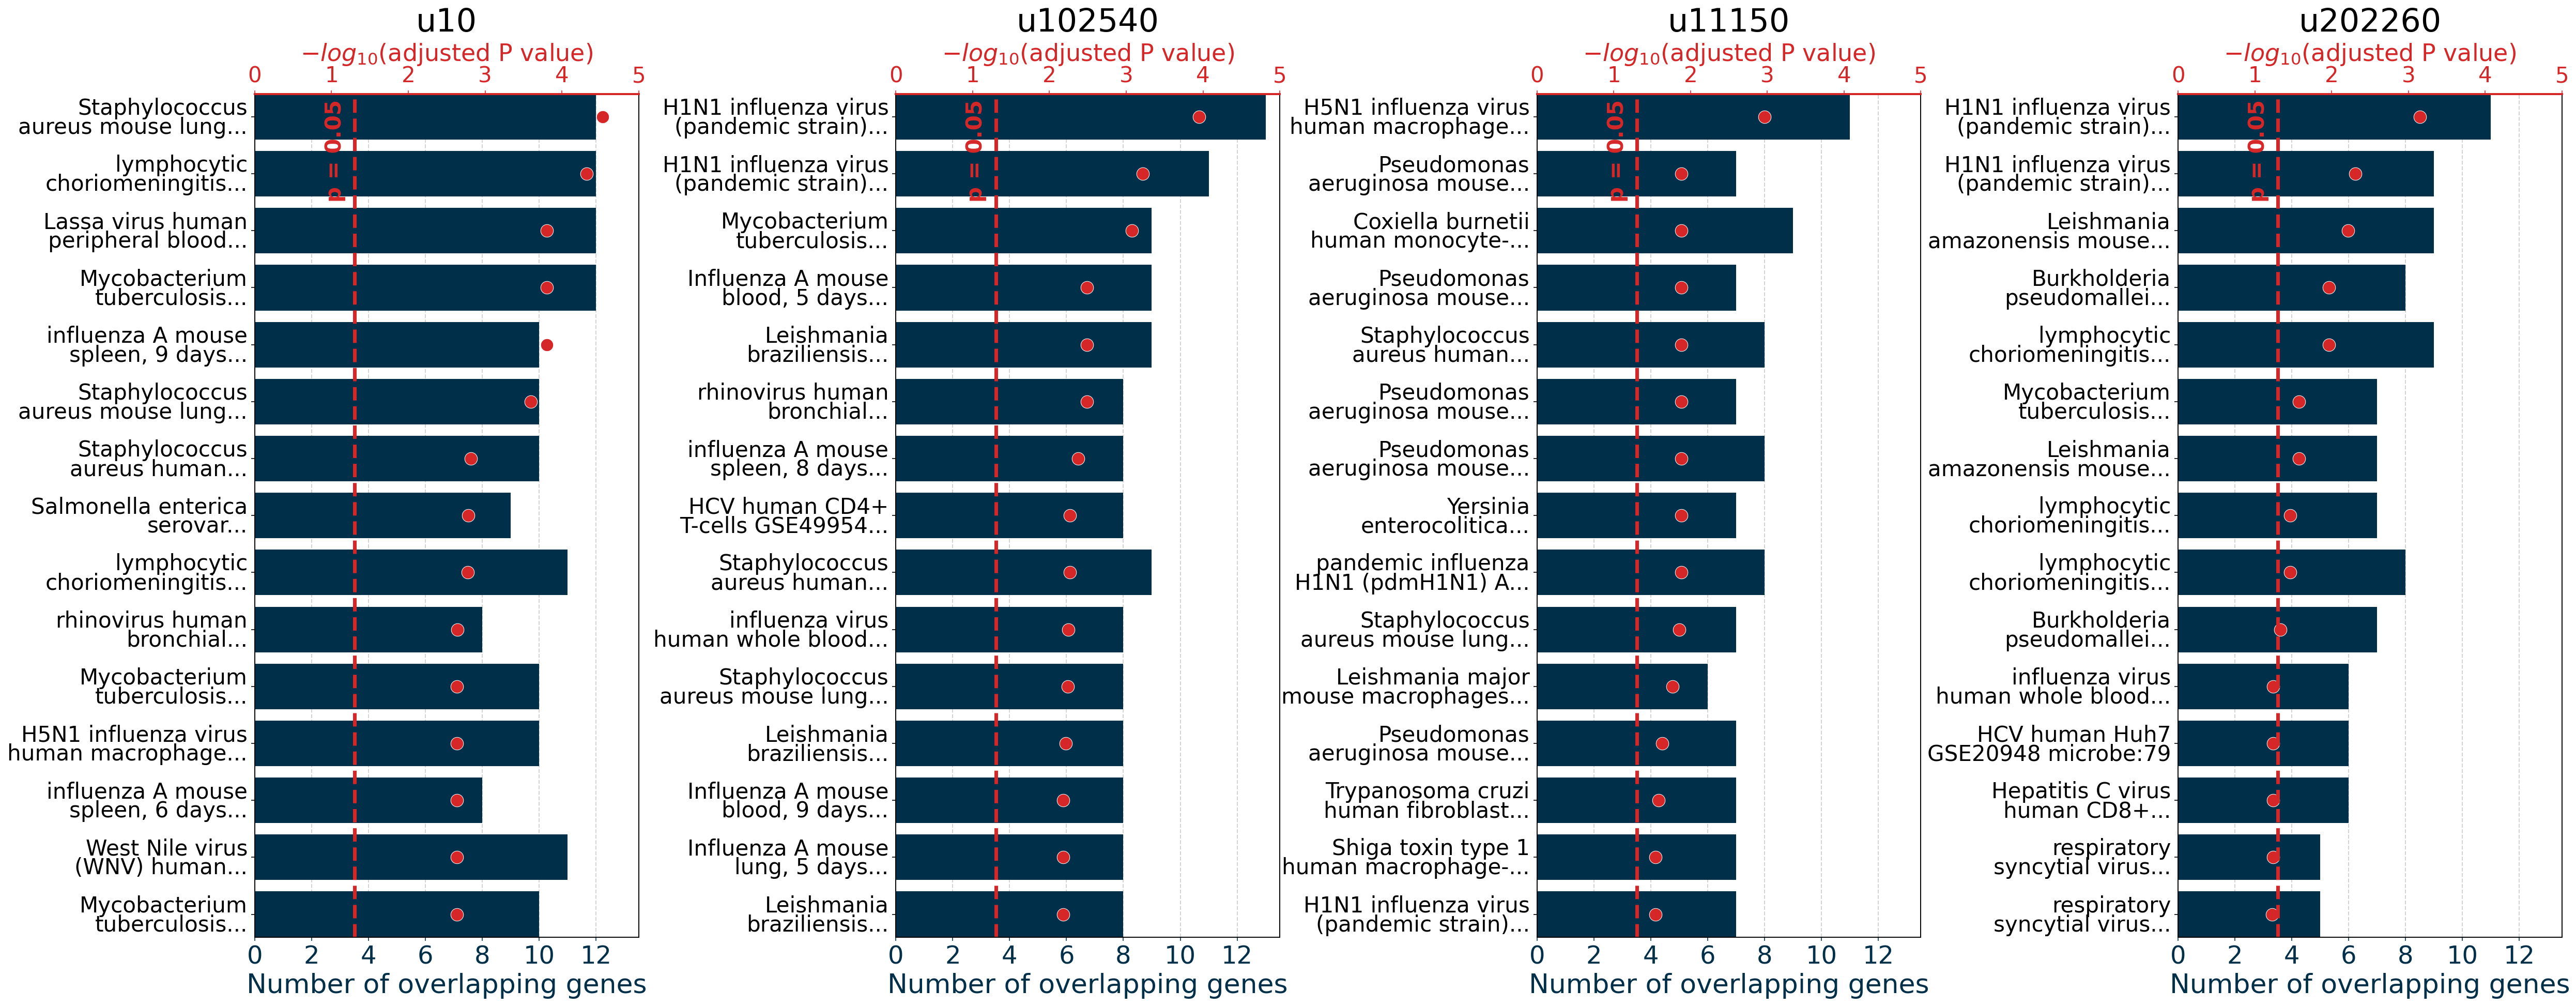

In [475]:
# Number of paths to plot
n_paths = 15
dfs = [
    u10_enrichr_df[:n_paths], 
    u102540_enrichr_df[:n_paths], 
    u11150_enrichr_df[:n_paths], 
    u202260_enrichr_df[:n_paths]
]
vir_names = ["u10", "u102540", "u11150", "u202260"]
             
fig, axs = plt.subplots(figsize=(40, 15), ncols=4)
fontsize = 21
barcolor = "#003049"
p_val_color = "tab:red" # orange: #f77f00

for i, (df, vir) in enumerate(zip(dfs, vir_names)):
    ax1 = axs[i]
    
    overlapping_genes = df["overlapping_genes"].values
    path_names = df["path_name"].values
    adj_p_values = df["adj_p_val"].values

    # Get gene counts
    gene_counts = []
    for gene_list in overlapping_genes:
        gene_counts.append(len(gene_list))
        
    # # Sort by number of genes in pathway
    # overlapping_genes = overlapping_genes[np.argsort(gene_counts)][::-1]
    # path_names = path_names[np.argsort(gene_counts)][::-1]
    # adj_p_values = adj_p_values[np.argsort(gene_counts)][::-1]
    # gene_counts = np.sort(gene_counts)[::-1]

    # Wrap pathway labels
    labels = []
    for label in path_names:
        labels.append(
            textwrap.fill(
                label,
                width=20,
                break_long_words=False,
                max_lines=2,
                placeholder="...",
            )
        )

    # Plot barplot
    # ax1.barh(labels, gene_counts, color=cmap(c_values), align="center")
    ax1.barh(np.arange(len(gene_counts)), gene_counts, color=barcolor, align="center")
    
#     # Add gene names to bar plot
#     for idx, (gc, og) in enumerate(zip(gene_counts, overlapping_genes)):
#         clean_genes = textwrap.fill(
#                 ", ".join(og),
#                 width=gc/2*10,
#                 break_long_words=False,
#                 max_lines=2,
#                 placeholder="...",
#             )
        
#         ax1.text(0.05, idx, clean_genes, fontsize=fontsize-2, color="lightgrey", va="center", ha="left")
        
    ax1.set_yticks(np.arange(len(gene_counts)), labels, linespacing=0.85, fontsize=fontsize)
    ax1.invert_yaxis()

    # Set x-limits
    # ax1.set_xlim(0, ax1.get_xlim()[1]+0.01)
    ax1.set_xlim(left=0, right=13.5)

    # Add adj. P value secondary x-axis
    ax2 = ax1.twiny()
    ax2.scatter(-np.log10(adj_p_values), np.arange(len(gene_counts)), color=p_val_color, s=150, edgecolor="white", lw=0.5)
    # Change label and color of p-value axis
    ax2.set_xlabel(
        "$-log_{10}$(adjusted P value)", fontsize=fontsize+2, color=p_val_color
    )
    ax2.spines["top"].set_color(p_val_color)
    ax2.spines["top"].set_linewidth(2)
    ax2.tick_params(axis="x", colors=p_val_color, labelsize=fontsize)
    
    # # Set x2-limits
    ax2.set_xlim(left=0, right=5)

    # Add alpha=0.05 p-value cutoff
    ax2.axvline(-np.log10(0.05), color=p_val_color, ls="--", lw=3.5)
    t = ax2.text(
        -np.log10(0.05) - 0.4,
        -0.3,
        "p = 0.05",
        ha="left",
        va="top",
        rotation="vertical",
        fontweight="bold",
        color=p_val_color,
        fontsize=fontsize,
    )
    # t.set_bbox(dict(facecolor='grey', alpha=0.5))

    # Set label and color of count axis
    ax1.set_xlabel(
        # f"Number of overlapping genes (query size: {len(genes_clean)})",
        f"Number of overlapping genes",
        color=barcolor,
        fontsize=fontsize+5,
    )
    # ax2.spines["bottom"].set_color(barcolor)
    # ax2.spines["bottom"].set_linewidth(2)
    ax1.tick_params(axis="x", labelsize=fontsize+3, colors=barcolor)
    # Set bottom x axis to keep only integers since counts cannot be floats
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    # Change fontsize of y-tick labels
    ax1.tick_params(axis="y", labelsize=fontsize)

    # Set title
    ax1.set_title(
        f"{vir}", fontsize=fontsize + 10, pad=10
    )

    # Set axis margins
    ax1.margins(y=0, x=0)

    ax1.grid(True, which="both", color="lightgrey", ls="--", lw=1)
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(False)
    
    # Remove grids
    # ax1.grid(False)
    # ax2.grid(False)
    
plt.subplots_adjust(wspace=0.67)

# Save figure
fig.savefig(
    f"figures/hv_l2_donor_time_gene_enrichment.png", dpi=300, bbox_inches="tight", transparent=True
)

fig.show()

In [476]:
# # Same plot but in a square layout (4x4 subplots)
# dfs = [u10_enrichr_df.iloc[[0,2,5,11,13,31,37,40,43,59,60,62,65,68,74,80]], u102540_enrichr_df.iloc[[0,1,3,4,5,6,7,8,10,15,30,40,43,64,65,80,83,90]], u11150_enrichr_df.iloc[[0,4,6,8,17,27,28,33,43,51,54,66,68,69,77,81,84]], u202260_enrichr_df.iloc[[1,2,3,4,5,6,7,8,22,24,25,33,37,44,49,58]]]
# vir_names = ["u10", "u102540", "u11150", "u202260"]
             
# fig, axs = plt.subplots(figsize=(13, 17), ncols=2, nrows=2, sharex=True)
# fontsize = 12
# barcolor = "#003049"
# p_val_color = "#f77f00"

# col = 0
# row = 0
# for i, (df, vir) in enumerate(zip(dfs, vir_names)):
#     ax1 = axs[row, col]
    
#     overlapping_genes = df["overlapping_genes"].values
#     path_names = df["path_name"].values
#     adj_p_values = df["adj_p_val"].values

#     # Get gene counts
#     gene_counts = []
#     for gene_list in overlapping_genes:
#         gene_counts.append(len(gene_list))

#     if i == 0 or i == 1:
#         # Wrap pathway labels
#         labels = []
#         for label in path_names:
#             labels.append(
#                 textwrap.fill(
#                     label,
#                     width=25,
#                     break_long_words=False,
#                     max_lines=3,
#                     placeholder="...",
#                 )
#             )
#     else:
#         # Wrap pathway labels
#         labels = []
#         for label in path_names:
#             labels.append(
#                 textwrap.fill(
#                     label,
#                     width=20,
#                     break_long_words=False,
#                     max_lines=3,
#                     placeholder="...",
#                 )
#             )

#     # Plot barplot
#     # ax1.barh(labels, gene_counts, color=cmap(c_values), align="center")
#     ax1.barh(labels, gene_counts, color=barcolor, align="center")
#     ax1.set_yticklabels(labels, linespacing=1, fontsize=fontsize)
#     ax1.invert_yaxis()

#     # Set x-limits
#     ax1.set_xlim(0, 4)

#     # Add adj. P value secondary x-axis
#     ax2 = ax1.twiny()
#     ax2.scatter(-np.log10(adj_p_values), labels, color=p_val_color, s=30)
#     # Change label and color of p-value axis
#     if i == 0 or i == 2:
#         ax2.set_xlabel(
#             "$-log_{10}$(adjusted P value)", fontsize=fontsize, color=p_val_color
#         )
#     else:
#         ax2.tick_params(labeltop=False) 
#     ax2.spines["top"].set_color(p_val_color)
#     ax2.spines["top"].set_linewidth(2)
#     ax2.tick_params(axis="x", colors=p_val_color, labelsize=fontsize)
    
#     # Set x2-limits
#     ax2.set_xlim(0, 1.7)

#     # Add alpha=0.05 p-value cutoff
#     ax2.axvline(-np.log10(0.05), color=p_val_color, ls="--", lw=1)
#     if i == 0:
#         ax2.text(
#             -np.log10(0.05) + 0.02,
#             -0.3,
#             "p = 0.05",
#             ha="left",
#             va="top",
#             rotation="vertical",
#             color=p_val_color,
#             fontsize=fontsize,
#         )

#     # Set label and color of count axis
#     if i == 1 or i == 3:
#         ax1.set_xlabel(
#             # f"Number of overlapping genes (query size: {len(genes_clean)})",
#             f"Number of overlapping genes",
#             color=barcolor,
#             fontsize=fontsize,
#         )
#     ax2.spines["bottom"].set_color(barcolor)
#     ax2.spines["bottom"].set_linewidth(2)
#     ax1.tick_params(axis="x", labelsize=fontsize, colors=barcolor)
#     # Set bottom x axis to keep only integers since counts cannot be floats
#     ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
#     # Change fontsize of y-tick labels
#     ax1.tick_params(axis="y", labelsize=fontsize)

#     # Set title
#     ax1.set_title(
#         f"{vir}", fontsize=fontsize + 2, pad=10
#     )

#     # Set axis margins
#     ax1.margins(y=0, x=0)

#     # Remove grids
#     ax1.grid(False)
#     ax2.grid(False)
    
#     if row == 1:
#         col += 1
#         row = 0
#     else:
#         row += 1

# plt.subplots_adjust(wspace=0.4, hspace=0.08)

# # Save figure
# fig.savefig(
#     f"figures/hv_l2_donor_time_gene_enrichment.png", dpi=300, bbox_inches="tight", transparent=True
# )

# fig.show()